In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import math

In [3]:
data2003 = pd.read_csv("Downloads/2003.csv")
data2004 = pd.read_csv("Downloads/2004.csv")
data2005 = pd.read_csv("Downloads/2005.csv")
data2006 = pd.read_csv("Downloads/2006.csv")
data2007 = pd.read_csv("Downloads/2007.csv")
data2008 = pd.read_csv("Downloads/2008.csv")

/Users/leva94/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data = pd.concat([data2003, data2004, data2005, data2006, data2007, data2008])

In [5]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
data["UniqueCarrier"].value_counts()

WN    6454950
AA    4006697
DL    3440463
OO    3090853
MQ    3025493
UA    3025212
US    2701364
NW    2682336
XE    2350309
CO    1829727
EV    1697172
OH    1464176
FL    1265138
AS     957377
YV     854056
B6     811341
DH     693047
HP     583311
9E     521059
F9     336958
HA     274265
TZ     208420
AQ      89547
Name: UniqueCarrier, dtype: int64

In [171]:
data_work = data.loc[data["UniqueCarrier"] == "CO"][["Origin", "Dest"]]

In [172]:
data_work["Flight"] = data_work["Origin"] + data_work["Dest"]

In [173]:
final = data_work["Flight"].value_counts()

In [174]:
final.to_csv("continental.csv", sep=',', encoding='utf-8')

In [175]:
final

BOSEWR    22751
EWRBOS    22348
IAHLAX    21956
EWRIAH    21787
MSYIAH    21767
IAHMSY    21754
LAXIAH    21726
IAHEWR    21198
IAHSAT    21069
SATIAH    21066
IAHAUS    20782
AUSIAH    20771
EWRMCO    19437
MCOEWR    19433
LGAIAH    19358
IAHLGA    19308
FLLEWR    16858
EWRFLL    16825
IAHDCA    16180
DCAIAH    16156
EWRATL    15382
ATLEWR    15349
IAHLAS    15281
IAHORD    15206
LASIAH    15135
ORDIAH    15105
DENIAH    15099
ORDEWR    14982
IAHDEN    14973
EWRORD    14881
          ...  
IAHCVG        1
SJCSAN        1
ORDCLE        1
SEAPDX        1
CLEMKE        1
MIAIND        1
LAXCMH        1
SEAMSY        1
SDFBOS        1
BHMEWR        1
LAXSDF        1
MDWCLE        1
PHLJAX        1
BWIEWR        1
LAXIND        1
SJCSFO        1
LBBIAH        1
SFOSAN        1
IAHCHS        1
SDFSMF        1
BOSSDF        1
EWRPHL        1
MSYSEA        1
SNACLE        1
MKECLE        1
INDLAX        1
MKEMDW        1
ORDMDW        1
LGAJAX        1
MSYCMH        1
Name: Flight, Length: 45

In [3]:
data_short = pd.read_csv("united.csv", sep=",", names=["Flight", "Quantity"])

In [4]:
data_short

,Flight,Quantity
0,SFOLAX,36176
1,LAXSFO,34762
2,LGAORD,30630
3,ORDLGA,30548
4,ORDDCA,28807
5,DCAORD,28797
6,DENORD,27549
7,LAXORD,26609
8,ORDDEN,26479
9,ORDLAX,25973


In [5]:
data_short["ORIGIN"] = data_short["Flight"].apply(lambda x: x[0:3])
data_short["DESTINATION"] = data_short["Flight"].apply(lambda x: x[3:6])

In [6]:
data_short

,Flight,Quantity,ORIGIN,DESTINATION
0,SFOLAX,36176,SFO,LAX
1,LAXSFO,34762,LAX,SFO
2,LGAORD,30630,LGA,ORD
3,ORDLGA,30548,ORD,LGA
4,ORDDCA,28807,ORD,DCA
5,DCAORD,28797,DCA,ORD
6,DENORD,27549,DEN,ORD
7,LAXORD,26609,LAX,ORD
8,ORDDEN,26479,ORD,DEN
9,ORDLAX,25973,ORD,LAX


In [7]:
air_info = data_short.groupby("ORIGIN")["Quantity"].sum() + data_short.groupby("DESTINATION")["Quantity"].sum()

In [8]:
air_info

ORIGIN
ABQ      20574
ALB       9575
ANC      10111
ATL      38450
AUS      10939
BDL      31961
BIL       9354
BOI      17517
BOS     120746
BTV       5899
BUF      14058
BUR      16942
BWI      63720
BZN        852
CID         43
CLE      24065
CLT      26095
CMH      26913
COS       7195
CVG       9209
DAY       7652
DCA      60884
DEN     966230
DFW      65895
DSM      23888
DTW      34010
EGE       3481
EUG       1263
EWR      70703
FLL      22114
        ...   
ONT      19702
ORD    1239143
PBI       5579
PDX      97477
PHL      78305
PHX      79842
PIT      28186
PSP       1458
PVD      17208
RAP        228
RDU       6442
RIC       8767
RNO      22994
ROC      12554
RSW       4525
SAN      99866
SAT      20053
SEA     132612
SFO     545527
SJC      42533
SJU      11208
SLC      34837
SMF      49048
SNA      60881
STL      19574
STT       2071
SYR         25
TPA      46881
TUL      10104
TUS      10634
Name: Quantity, Length: 95, dtype: int64

In [9]:
air_info.nlargest(95)

ORIGIN
ORD    1239143
DEN     966230
SFO     545527
LAX     411353
IAD     309317
LAS     145329
SEA     132612
BOS     120746
SAN      99866
PDX      97477
LGA      90400
MCO      87148
PHX      79842
PHL      78305
MSP      72934
EWR      70703
DFW      65895
BWI      63720
DCA      60884
SNA      60881
JFK      57274
SMF      49048
TPA      46881
OAK      42718
SJC      42533
HNL      41951
MCI      41512
OMA      40719
ATL      38450
IAH      35816
        ...   
ALB       9575
JAC       9528
BIL       9354
CVG       9209
RIC       8767
DAY       7652
GSO       7371
COS       7195
MDT       6579
RDU       6442
BTV       5899
PBI       5579
RSW       4525
MDW       3629
EGE       3481
JAX       2334
STT       2071
FSD       1889
PSP       1458
HDN       1382
EUG       1263
BZN        852
GUC        626
MSO        470
MTJ        350
RAP        228
CID         43
MFR         35
SYR         25
HPN         23
Name: Quantity, Length: 95, dtype: int64

In [10]:
largest_airports = air_info.nlargest(95).index

In [11]:
largest_airports

Index(['ORD', 'DEN', 'SFO', 'LAX', 'IAD', 'LAS', 'SEA', 'BOS', 'SAN', 'PDX',
       'LGA', 'MCO', 'PHX', 'PHL', 'MSP', 'EWR', 'DFW', 'BWI', 'DCA', 'SNA',
       'JFK', 'SMF', 'TPA', 'OAK', 'SJC', 'HNL', 'MCI', 'OMA', 'ATL', 'IAH',
       'MSY', 'SLC', 'DTW', 'BDL', 'PIT', 'MIA', 'CMH', 'OGG', 'CLT', 'CLE',
       'DSM', 'RNO', 'FLL', 'ABQ', 'SAT', 'ONT', 'STL', 'KOA', 'IND', 'BOI',
       'PVD', 'BUR', 'GEG', 'OKC', 'MHT', 'BUF', 'GRR', 'LIH', 'ROC', 'SJU',
       'AUS', 'TUS', 'ICT', 'ANC', 'TUL', 'ALB', 'JAC', 'BIL', 'CVG', 'RIC',
       'DAY', 'GSO', 'COS', 'MDT', 'RDU', 'BTV', 'PBI', 'RSW', 'MDW', 'EGE',
       'JAX', 'STT', 'FSD', 'PSP', 'HDN', 'EUG', 'BZN', 'GUC', 'MSO', 'MTJ',
       'RAP', 'CID', 'MFR', 'SYR', 'HPN'],
      dtype='object', name='ORIGIN')

In [12]:
matrix = pd.DataFrame(0, index=largest_airports, columns=largest_airports)

In [13]:
for i in range(487):
    if data_short["ORIGIN"][i] in list(largest_airports):
        if data_short["DESTINATION"][i] in list(largest_airports):
            matrix[data_short["ORIGIN"][i]][data_short["DESTINATION"][i]] += data_short["Quantity"][i]
            matrix[data_short["DESTINATION"][i]][data_short["ORIGIN"][i]] += data_short["Quantity"][i]

In [14]:
class Graph:
    def __init__(self, incidence_matrix):
        self.incidence_matrix = pd.DataFrame(np.array(incidence_matrix), 
                                             index=incidence_matrix.index, columns=incidence_matrix.columns)
        self.prec = pd.Series("", index=incidence_matrix.index)
        self.time_in = pd.Series(-1, index=incidence_matrix.index)
        succlist = []
        for i in incidence_matrix.index:
            succlist.append([])
        self.succ = pd.Series(succlist, index=incidence_matrix.index)
        self.ret = pd.Series(-1, index=incidence_matrix.index)
        self.tight_component = pd.Series(-1, index=incidence_matrix.index)
        self.cur_time = -1
        self.bridges = []
        self.most_popular_dests = []
        
    def reinit(self):
        self.prec = pd.Series("", index=self.incidence_matrix.index)
        self.time_in = pd.Series(-1, index=self.incidence_matrix.index)
        succlist = []
        for i in self.incidence_matrix.index:
            succlist.append([])
        self.succ = pd.Series(succlist, index=self.incidence_matrix.index)
        self.ret = pd.Series(-1, index=self.incidence_matrix.index)
        self.tight_component = pd.Series(-1, index=self.incidence_matrix.index)
        self.cur_time = -1
        self.bridges = []
        
    def find_popular_dests(self):
        the_matrix = pd.DataFrame(np.array(self.incidence_matrix), 
                                    index=self.incidence_matrix.index, columns=self.incidence_matrix.columns)
        maxx = 200000
        list_of_dests = []
        while (maxx > 10000):
            max_origin = the_matrix.max().idxmax()
            max_dest = the_matrix[max_origin].idxmax()
            maxx = the_matrix[max_origin][max_dest]
            the_matrix[max_origin][max_dest] = -maxx
            the_matrix[max_dest][max_origin] = -maxx
            list_of_dests.append([max_origin, max_dest, maxx])
        graph.most_popular_dests = pd.DataFrame(list_of_dests)
        return pd.DataFrame(list_of_dests)
        
    def dfs(self, min_flights, airport):
        for dest in self.incidence_matrix.index:
            if (self.incidence_matrix[airport][dest] >= min_flights):
                if (self.prec[dest] == ""):
                    self.cur_time += 1
                    self.time_in[dest] = self.cur_time
                    self.ret[dest] = self.cur_time
                    self.prec[dest] = airport
                    self.succ[airport].append(dest)
                    self.dfs(min_flights, dest)
        
    def BIG_DFS(self, min_flights):
        for ap in self.incidence_matrix.index:
            if (self.prec[ap] == ""):
                self.prec[ap] = ap
                self.cur_time += 1
                self.time_in[ap] = self.cur_time
                self.ret[ap] = self.cur_time
                self.dfs(min_flights, ap)
        return self.time_in
    
    def count_return(self, ap, min_flights):
        for dest in self.succ[ap]:
            self.count_return(dest, min_flights)
            if (self.ret[dest] < self.ret[ap]):
                self.ret[ap] = self.ret[dest]
        for dest in self.incidence_matrix.index:
            if (self.incidence_matrix[dest][ap] >= min_flights):
                if (dest != self.prec[ap]):
                    if (self.time_in[dest] < self.ret[ap]):
                        self.ret[ap] = self.time_in[dest]
                    
    def COUNT_RETURNS(self, min_flights):
        for airport in self.incidence_matrix.index:
            if (self.prec[airport] == airport):
                self.count_return(airport, min_flights)
    
    def find_tight_component(self, vertex, marker):
        self.tight_component[vertex] = marker
        for dest in self.succ[vertex]:
            if (self.ret[dest] > self.time_in[vertex]):
                self.prec[dest] = dest
                self.bridges.append([vertex, dest])
            else:
                self.find_tight_component(dest, marker)
    
    def TIGHT_COMPONENTS_SPLIT(self, min_flights):
        self.BIG_DFS(min_flights)
        self.COUNT_RETURNS(min_flights)
        marker = -1
        while ((self.tight_component == -1).any()):
            for city in self.incidence_matrix.index:
                if (self.tight_component[city] == -1):
                    if (self.prec[city] == city):
                        marker +=1
                        self.find_tight_component(city, marker)
        return self.tight_component
    
    def GAMMA_ALGORITHM(self, min_flights, component_marker):
        list_of_cities = []
        for city in self.incidence_matrix.index:
            if (self.tight_component[city] == component_marker):
                list_of_cities.append(city)
        if (len(list_of_cities) < 2):
            return True
        component_matrix = self.incidence_matrix[list_of_cities].loc[list_of_cities]
        component_matrix = (component_matrix >= min_flights)
        written_cities = pd.Series(False, index=list_of_cities)
        stack_of_cities = []
        stack_of_cities.append(list_of_cities[0])
        while (len(stack_of_cities) < len(list_of_cities) + 1):
            for city in list_of_cities:
                if (component_matrix[city][stack_of_cities[-1]]):
                    if (len(stack_of_cities) == 1):
                        stack_of_cities.append(city)
                    else:
                        if (city != stack_of_cities[-2]):
                            stack_of_cities.append(city)
        begin = -1
        end = len(stack_of_cities)
        for i in range(len(stack_of_cities)):
            for j in range(i+1, end, 1):
                if (stack_of_cities[i] == stack_of_cities[j]):
                    if (j < end):
                        begin = i
                        end = j
        list_of_faces = []
        face = []
        for i in range(begin, end):
            face.append(stack_of_cities[i])
            component_matrix[stack_of_cities[i]][stack_of_cities[i+1]] = False
            component_matrix[stack_of_cities[i+1]][stack_of_cities[i]] = False
            written_cities[stack_of_cities[i]] = True
        list_of_faces.append(face)
        list_of_faces.append(face)
        while (component_matrix.any().any()):
            set_of_segments = []
            interior_matrix = component_matrix.loc[written_cities, written_cities]
            if (interior_matrix.any().any()):
                for city in interior_matrix.index:
                    for dest in interior_matrix.index:
                        if (interior_matrix[city][dest] & (city > dest)):
                            set_of_vertices = set([])
                            set_of_adjacent = set([city, dest])
                            faces_to_add = []
                            gamma = 0
                            for i in range(len(list_of_faces)):
                                if set_of_adjacent.issubset(set(list_of_faces[i])):
                                    gamma +=1
                                    faces_to_add.append(i)
                            set_of_segments.append((set_of_vertices, set_of_adjacent, gamma, faces_to_add))
            if (not (written_cities.all())):
                rest_matrix = component_matrix.loc[-written_cities, -written_cities]
                segment_markers = pd.Series(-1, index=rest_matrix.index)
                marker = 0
                segment_markers[rest_matrix.index[0]] = 0
                while ((segment_markers == -1).any()):
                    if (rest_matrix.loc[segment_markers == marker, segment_markers != marker].any().any()):
                        for city in segment_markers.index:
                            if (segment_markers[city] == marker):
                                for dest in segment_markers.index:
                                    if (rest_matrix[city][dest]):
                                        segment_markers[dest] = marker
                    else:
                        marker +=1
                        control = True
                        for city in segment_markers.index:
                            if (segment_markers[city] == -1):
                                if (control):
                                    segment_markers[city] = marker
                                    control = False
                for i in range(marker+1):
                    set_of_vertices = set([])
                    set_of_adjacent = set([])
                    for city in segment_markers.index:
                        if (segment_markers[city] == i):
                            set_of_vertices.add(city)
                            for dest in interior_matrix.index:
                                if component_matrix[city][dest]:
                                    set_of_adjacent.add(dest)
                    faces_to_add = []
                    gamma = 0
                    for i in range(len(list_of_faces)):
                        if set_of_adjacent.issubset(set(list_of_faces[i])):
                            gamma +=1
                            faces_to_add.append(i)
                    set_of_segments.append((set_of_vertices, set_of_adjacent, gamma, faces_to_add))
            min_segment = (set([]), set([]), 100 * len(component_matrix.index), [])
            for segment in set_of_segments:
                if (segment[2] < min_segment[2]):
                    min_segment = segment
            if (min_segment[2] == 0):
                return False
            list_of_adjacent = list(min_segment[1])
            if (len(list_of_adjacent) == 1):
                first_vertex = ""
                second_vertex = ""
                for city in min_segment[0]:
                    if (component_matrix[list_of_adjacent[0]][city]):
                        if (first_vertex == ""):
                            first_vertex = city
                        else:
                            if (second_vertex == ""):
                                second_vertex = city
                component_matrix[list_of_adjacent[0]][first_vertex] = False
                component_matrix[first_vertex][list_of_adjacent[0]] = False
                component_matrix[list_of_adjacent[0]][second_vertex] = False
                component_matrix[second_vertex][list_of_adjacent[0]] = False
                visited = pd.Series(False, index=min_segment[0])
                visited[first_vertex] = True
                stack_of_vertices = [first_vertex]
                path = []
                while (len(stack_of_vertices) > 0):
                    current = stack_of_vertices[-1]
                    if (current == second_vertex):
                        path = list(stack_of_vertices)
                    for dest in min_segment[0]:
                        if (current == stack_of_vertices[-1]):
                            if (component_matrix[current][dest]):
                                if (not visited[dest]):
                                    stack_of_vertices.append(dest)
                                    visited[dest] = True
                    if (current == stack_of_vertices[-1]):
                        stack_of_vertices.pop()
                for i in range(len(path) - 1):
                    component_matrix[path[i]][path[i+1]] = False
                    component_matrix[path[i+1]][path[i]] = False
                for i in range(len(path)):
                    written_cities[path[i]] = True
                path.append(list_of_adjacent[0])
                Face = list(list_of_faces[min_segment[3][0]])
                index = Face.index(list_of_adjacent[0]) + 1
                list_of_faces[min_segment[3][0]] = Face[:index]
                list_of_faces[min_segment[3][0]].extend(path)
                list_of_faces[min_segment[3][0]].extend(Face[index:])
                list_of_faces.append(path)
            else:
                path = []
                list_of_adjacent = list(min_segment[1])
                if (len(min_segment[0]) != 0):
                    first_vertex = ""
                    second_vertex = ""
                    for city in min_segment[0]:
                        if (component_matrix[list_of_adjacent[0]][city]):
                            if (first_vertex == ""):
                                first_vertex = city
                        if (component_matrix[list_of_adjacent[1]][city]):
                            if (second_vertex == ""):
                                second_vertex = city
                    component_matrix[list_of_adjacent[0]][first_vertex] = False
                    component_matrix[first_vertex][list_of_adjacent[0]] = False
                    component_matrix[list_of_adjacent[1]][second_vertex] = False
                    component_matrix[second_vertex][list_of_adjacent[1]] = False
                    visited = pd.Series(False, index=min_segment[0])
                    visited[first_vertex] = True
                    stack_of_vertices = [first_vertex]
                    while (len(stack_of_vertices) > 0):
                        current = stack_of_vertices[-1]
                        if (current == second_vertex):
                            path = list(stack_of_vertices)
                        for dest in min_segment[0]:
                            if (current == stack_of_vertices[-1]):
                                if (component_matrix[current][dest]):
                                    if (not visited[dest]):
                                        stack_of_vertices.append(dest)
                                        visited[dest] = True
                        if (current == stack_of_vertices[-1]):
                            stack_of_vertices.pop()
                        for i in range(len(path) - 1):
                            component_matrix[path[i]][path[i+1]] = False
                            component_matrix[path[i+1]][path[i]] = False
                        for i in range(len(path)):
                            written_cities[path[i]] = True
                else:
                    component_matrix[list_of_adjacent[0]][list_of_adjacent[1]] = False
                    component_matrix[list_of_adjacent[1]][list_of_adjacent[0]] = False
                reverse_path = list(path)
                reverse_path.reverse()
                Face = list(list_of_faces[min_segment[3][0]])
                first_index = Face.index(list_of_adjacent[0])
                second_index = Face.index(list_of_adjacent[1])
                if (first_index < second_index):
                    list_of_faces[min_segment[3][0]] = Face[first_index : second_index + 1]
                    list_of_faces[min_segment[3][0]].extend(reverse_path)
                    new_face = Face[: first_index + 1]
                    new_face.extend(path)
                    new_face.extend(Face[second_index :])
                else:
                    list_of_faces[min_segment[3][0]] = Face[second_index : first_index + 1]
                    list_of_faces[min_segment[3][0]].extend(path)
                    new_face = Face[: second_index + 1]
                    new_face.extend(reverse_path)
                    new_face.extend(Face[first_index :])
                list_of_faces.append(new_face)    
        return list_of_faces

In [15]:
graph = Graph(matrix)

In [16]:
graph.reinit()

In [17]:
graph.find_popular_dests()

,0,1,2
0,SFO,LAX,70938
1,ORD,LGA,61178
2,ORD,DCA,57604
3,ORD,DEN,54028
4,ORD,LAX,52582
5,ORD,MSP,49117
6,DEN,LAX,47680
7,ORD,SFO,47601
8,ORD,BOS,45451
9,DEN,SFO,41893


In [18]:
for i in range(len(graph.most_popular_dests) - 1):
    print(i)
    graph.reinit()
    graph.TIGHT_COMPONENTS_SPLIT(graph.most_popular_dests[2][i])
    for j in range(100):
        if (graph.GAMMA_ALGORITHM(graph.most_popular_dests[2][i], j) == False):
            graph.incidence_matrix[graph.most_popular_dests[0][i]][graph.most_popular_dests[1][i]] = 0
            graph.incidence_matrix[graph.most_popular_dests[1][i]][graph.most_popular_dests[0][i]] = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107


In [19]:
graph.reinit()
graph.TIGHT_COMPONENTS_SPLIT(graph.most_popular_dests[2][len(graph.most_popular_dests) - 2])
target_split = graph.GAMMA_ALGORITHM(graph.most_popular_dests[2][len(graph.most_popular_dests) - 2], 0)

In [20]:
set_of_cities = set([])
for i in range(len(target_split)):
    for j in range(len(target_split[i])):
        set_of_cities.add(target_split[i][j])

In [21]:
target_matrix = graph.incidence_matrix.loc[set_of_cities, set_of_cities] >= 10000

In [22]:
for face in target_split:
    while (len(face) > 3):
        if (target_matrix[face[0]][face[2]]):
            target_matrix[face[1]][face[3]] = True
            target_matrix[face[3]][face[1]] = True
            target_split.append([face[1], face[2], face[3]])
            face.remove(face[2])
        else:
            target_matrix[face[0]][face[2]] = True
            target_matrix[face[2]][face[0]] = True
            target_split.append([face[1], face[2], face[0]])
            face.remove(face[1])

In [23]:
outer_face = frozenset(target_split[0])
number_of_faces = len(target_split[1:])
inner_faces = dict()
for face in target_split[1:]:
    inner_faces[frozenset(face)] = 1
secondary_cities = []
while ((target_matrix.sum().min() < 4) & (len(target_matrix) > 3)):
    rem_city = target_matrix.sum().idxmin()
    adjacent_cities = list(target_matrix[rem_city][target_matrix[rem_city]].index)
    faces_to_remove = []
    faces_to_remove.append(frozenset([adjacent_cities[0], adjacent_cities[1], rem_city]))
    faces_to_remove.append(frozenset([adjacent_cities[0], adjacent_cities[2], rem_city]))
    faces_to_remove.append(frozenset([adjacent_cities[1], adjacent_cities[2], rem_city]))
    weight_face = pd.Series(0, index=adjacent_cities)
    if (rem_city in outer_face):
        old_number = number_of_faces
        for face in faces_to_remove:
            if (face == outer_face):
                outer_face = frozenset(adjacent_cities)
                for city in adjacent_cities:
                    if (not (city in face)):
                        weight_face[city] = old_number
            else:
                for city in adjacent_cities:
                    if (not (city in face)):
                        weight = inner_faces.pop(face)
                        weight_face[city] = -weight
                        number_of_faces -= weight
    else:
        for face in faces_to_remove:
            for city in adjacent_cities:
                if (not (city in face)):
                    weight_face[city] = inner_faces.pop(face)
        inner_faces[frozenset(adjacent_cities)] = weight_face.sum()
    target_matrix = target_matrix.drop([rem_city], axis=0)
    target_matrix = target_matrix.drop([rem_city], axis=1)
    secondary_cities.append([rem_city, weight_face])

In [24]:
X = pd.Series(0, index=target_matrix.index, dtype=float)
Y = pd.Series(0, index=target_matrix.index, dtype=float)
X[list(outer_face)[1]] = 1
X[list(outer_face)[2]] = 2
Y[list(outer_face)[1]] = 2

In [25]:
def area(face, X, Y):
    return 0.5 * np.abs((X[face[1]] - X[face[0]]) * (Y[face[2]] - Y[face[0]]) - (X[face[2]] - X[face[0]]) * (Y[face[1]] - Y[face[0]]))

In [26]:
faces_to_move = list(inner_faces.keys())

In [27]:
weight = (1 / target_matrix.sum(1))
target_matrixx = target_matrix.drop(outer_face, axis=1)
for iterr in range(1000):
    if (iterr % 10 == 0):
        print(iterr)
        total_area = 0
        for face in faces_to_move:
            total_area += area(list(face), X, Y)
        print(total_area - 2.0)
    for city in target_matrixx.columns:
        X[city] = 0.2 * (X[target_matrixx[city]] * weight[target_matrixx[city]]).mean() / weight[target_matrixx[city]].mean() + 0.8 * X[city]
        Y[city] = 0.2 * (Y[target_matrixx[city]] * weight[target_matrixx[city]]).mean() / weight[target_matrixx[city]].mean() + 0.8 * Y[city]

0
0.0
10
0.0
20
0.0
30
0.0
40
0.0
50
0.0
60
0.0
70
0.0
80
0.0
90
0.0
100
0.0
110
0.0
120
0.0
130
0.0
140
0.0
150
0.0
160
0.0
170
0.0
180
0.0
190
0.0
200
0.0
210
0.0
220
0.0
230
0.0
240
0.0
250
0.0
260
0.0
270
0.0
280
0.0
290
0.0
300
0.0
310
0.0
320
0.0
330
0.0
340
0.0
350
0.0
360
0.0
370
0.0
380
0.0
390
0.0
400
0.0
410
0.0
420
0.0
430
0.0
440
0.0
450
0.0
460
0.0
470
0.0
480
0.0
490
0.0
500
0.0
510
0.0
520
0.0
530
0.0
540
0.0
550
0.0
560
0.0
570
0.0
580
0.0
590
0.0
600
0.0
610
0.0
620
0.0
630
0.0
640
0.0
650
0.0
660
0.0
670
0.0
680
0.0
690
0.0
700
0.0
710
0.0
720
0.0
730
0.0
740
0.0
750
0.0
760
0.0
770
0.0
780
0.0
790
0.0
800
0.0
810
0.0
820
0.0
830
0.0
840
0.0
850
0.0
860
0.0
870
0.0
880
0.0
890
0.0
900
0.0
910
0.0
920
0.0
930
0.0
940
0.0
950
0.0
960
0.0
970
0.0
980
0.0
990
0.0


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

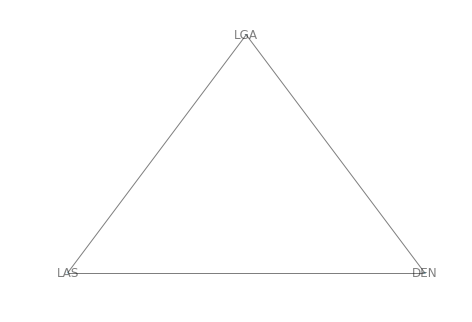

In [29]:
list_of_cities = list(set_of_cities)
list_from = []
list_to = []
for i in range(len(target_matrix.index)):
    for j in range(i + 1, len(target_matrix.index)):
        if (target_matrix.iloc[i, j]):
            list_from.append(target_matrix.index[i])
            list_to.append(target_matrix.index[j])
draw_df = pd.DataFrame({"from":list_from, "to":list_to})
NW = nx.from_pandas_dataframe(draw_df, "from", "to")
dic = {}
for i in target_matrix.index:
    dic[i] = (X[i], Y[i])
nx.draw(NW, pos=dic, with_labels=True, node_size=np.array(graph.incidence_matrix.loc[list(NW.nodes),
                                                                                     list(NW.nodes)].sum()**2 /3000000000),
        node_color="skyblue", node_shape="o", alpha=0.5)


In [30]:
inner_faces

{frozenset({'DEN', 'LAS', 'LGA'}): 1}

In [31]:
secondary_cities.reverse()

In [32]:
for el in secondary_cities:
    X[el[0]] = (X[el[1].index] * el[1]).sum() / el[1].sum()
    Y[el[0]] = (Y[el[1].index] * el[1]).sum() / el[1].sum()

In [34]:
def affine_normalize(target_split, X, Y):
    X = X - X[target_split[0][0]]
    Y = Y - Y[target_split[0][0]]
    det = Y[target_split[0][2]] * X[target_split[0][1]] - Y[target_split[0][1]] * X[target_split[0][2]]
    a = (2 * Y[target_split[0][2]] - 4 * Y[target_split[0][1]]) / det
    b = (4 * X[target_split[0][1]] - 2 * X[target_split[0][2]]) / det
    c = 3.5 * Y[target_split[0][2]] / det
    d = -3.5 * X[target_split[0][2]] / det
    X, Y = a * X + b * Y, c * X + d * Y
    return X, Y
X, Y = affine_normalize(target_split, X, Y)

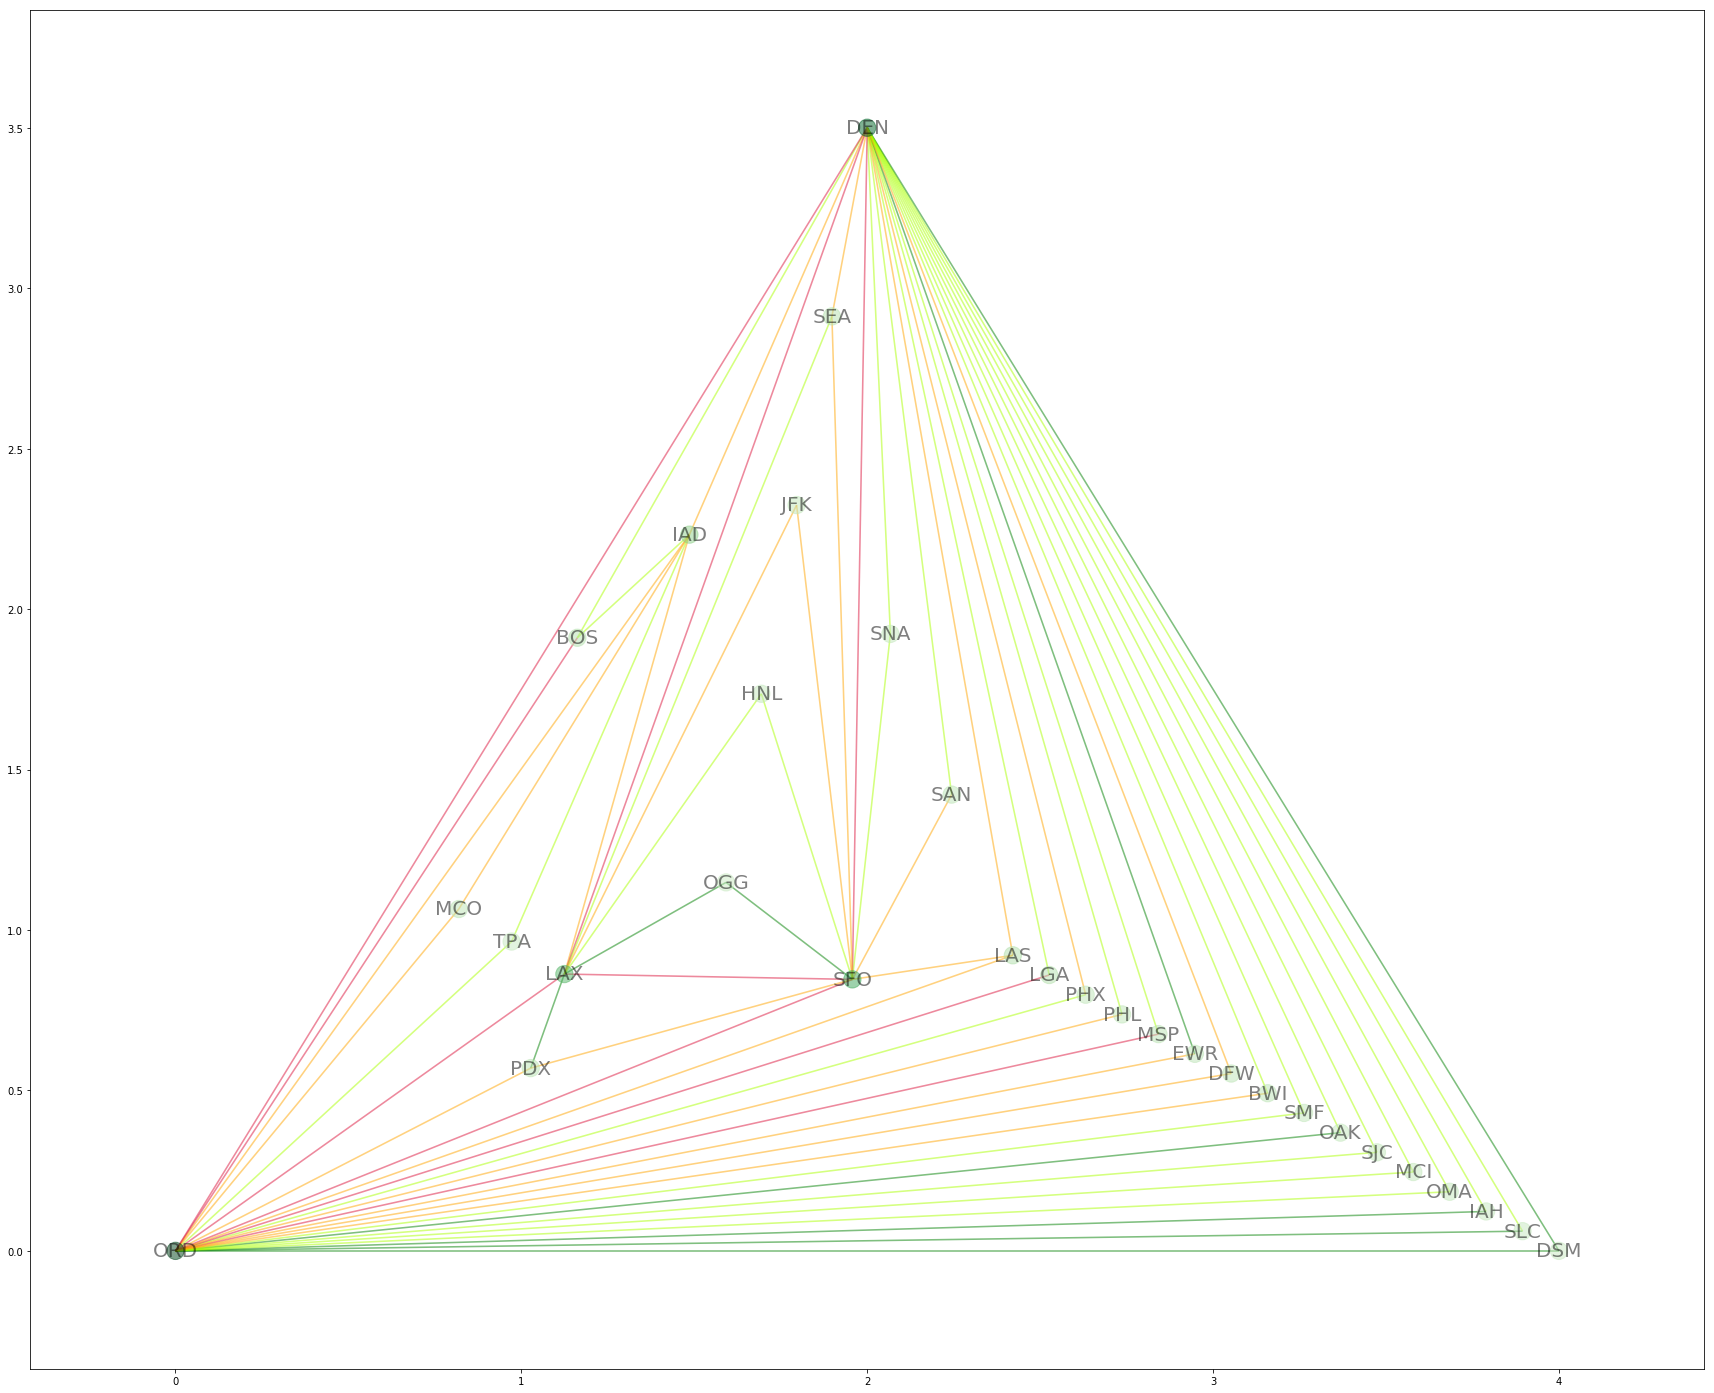

In [36]:
list_of_cities = list(set_of_cities)
list_from = []
list_to = []
list_capacity = []
for i in range(len(set_of_cities)):
    for j in range(i + 1, len(set_of_cities)):
        if (graph.incidence_matrix[list_of_cities[i]][list_of_cities[j]] >= 10000):
            list_from.append(list_of_cities[i])
            list_to.append(list_of_cities[j])
            list_capacity.append(graph.incidence_matrix[list_of_cities[i]][list_of_cities[j]])
draw_df = pd.DataFrame({"from":list_from, "to":list_to, "weight":list_capacity})
fig = plt.figure(figsize=(30,25))
NW = nx.from_pandas_dataframe(draw_df, "from", "to", create_using=nx.Graph())
dic = {}
colors = pd.Series("", index=list(NW.edges()))
for edge in list(NW.edges()):
    if (graph.incidence_matrix[edge[0]][edge[1]] > 25000):
        if (graph.incidence_matrix[edge[0]][edge[1]] > 40000):
            colors[edge] = "crimson"
        else:
            colors[edge] = "orange"
    else:
        if (graph.incidence_matrix[edge[0]][edge[1]] > 15000):
            colors[edge] = "#aaff00"
        else:
            colors[edge] = "green"
for i in set_of_cities:
    dic[i] = (X[i], Y[i])
nx.draw_networkx(NW, pos=dic, with_labels=True, node_size=300,
                 edge_color=colors, node_color=graph.incidence_matrix.loc[list(NW.nodes),
                                                                                     list(NW.nodes)].sum(),
                 cmap=plt.cm.Greens, vmin=-200000, node_shape="o", alpha=0.5, width=1.6,
                 font_size=20)